# Dev. #8 | Sampling Rateの確認

- ひとまず、ファイルごとのサンプリングレートは一定であると考える。

## [1] Sampling Rateの分布の確認

In [8]:
from pathlib import Path

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set("notebook", "whitegrid")

In [17]:
df = pd.read_csv("./data/U0002_S0100.csv")
print(df.shape)

df = df[df["body_index"] == 0].reset_index(drop=True)
print(df.shape)

(50940, 258)
(48006, 258)


In [18]:
df.head()

,timestamp,body_index,J00_P0,J00_P1,J00_P2,J00_O0,J00_O1,J00_O2,J00_O3,J00_CONF,...,J30_O3,J30_CONF,J31_P0,J31_P1,J31_P2,J31_O0,J31_O1,J31_O2,J31_O3,J31_CONF
0,1.634869e+09,0,47.8702,348.741,2230.89,0.550014,-0.434476,0.474469,-0.532536,2,...,0.162899,2,-18.7838,-187.917,2152.40,0.630032,-0.257972,0.613827,-0.399658,2
1,1.634869e+09,0,46.8710,351.886,2230.96,0.549369,-0.436875,0.473526,-0.532078,2,...,0.193177,2,-15.2510,-198.904,2153.60,0.653550,-0.291262,0.585977,-0.380356,2
2,1.634869e+09,0,47.0129,353.611,2231.05,0.549459,-0.437178,0.473282,-0.531952,2,...,0.222863,2,-8.1355,-215.948,2156.89,0.665434,-0.370231,0.545385,-0.350259,2
3,1.634869e+09,0,42.4397,363.462,2242.18,0.572130,-0.413092,0.451773,-0.545823,2,...,0.241729,2,-12.7205,-215.574,2146.01,0.657378,-0.317591,0.606166,-0.315521,2
4,1.634869e+09,0,44.0698,365.538,2232.18,0.536085,-0.453433,0.475391,-0.530108,2,...,0.253010,2,-8.6541,-226.098,2153.21,0.675698,-0.352522,0.564011,-0.317887,2


In [19]:
df["delta"] = df["timestamp"] - df["timestamp"].shift(1)

In [20]:
df.head()

,timestamp,body_index,J00_P0,J00_P1,J00_P2,J00_O0,J00_O1,J00_O2,J00_O3,J00_CONF,...,J30_CONF,J31_P0,J31_P1,J31_P2,J31_O0,J31_O1,J31_O2,J31_O3,J31_CONF,delta
0,1.634869e+09,0,47.8702,348.741,2230.89,0.550014,-0.434476,0.474469,-0.532536,2,...,2,-18.7838,-187.917,2152.40,0.630032,-0.257972,0.613827,-0.399658,2,NaN
1,1.634869e+09,0,46.8710,351.886,2230.96,0.549369,-0.436875,0.473526,-0.532078,2,...,2,-15.2510,-198.904,2153.60,0.653550,-0.291262,0.585977,-0.380356,2,0.066706
2,1.634869e+09,0,47.0129,353.611,2231.05,0.549459,-0.437178,0.473282,-0.531952,2,...,2,-8.1355,-215.948,2156.89,0.665434,-0.370231,0.545385,-0.350259,2,0.066684
3,1.634869e+09,0,42.4397,363.462,2242.18,0.572130,-0.413092,0.451773,-0.545823,2,...,2,-12.7205,-215.574,2146.01,0.657378,-0.317591,0.606166,-0.315521,2,0.066706
4,1.634869e+09,0,44.0698,365.538,2232.18,0.536085,-0.453433,0.475391,-0.530108,2,...,2,-8.6541,-226.098,2153.21,0.675698,-0.352522,0.564011,-0.317887,2,0.066684


<AxesSubplot:>

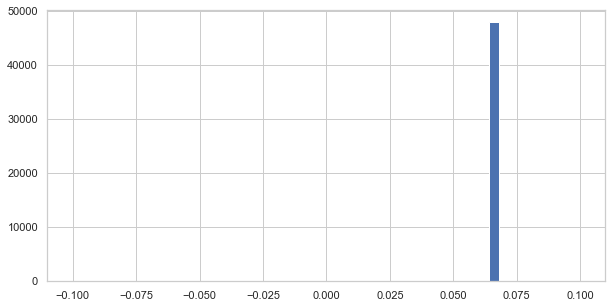

In [21]:
df["delta"].hist(figsize=(10,5), range=(-0.1, 0.1), bins=50)

<AxesSubplot:>

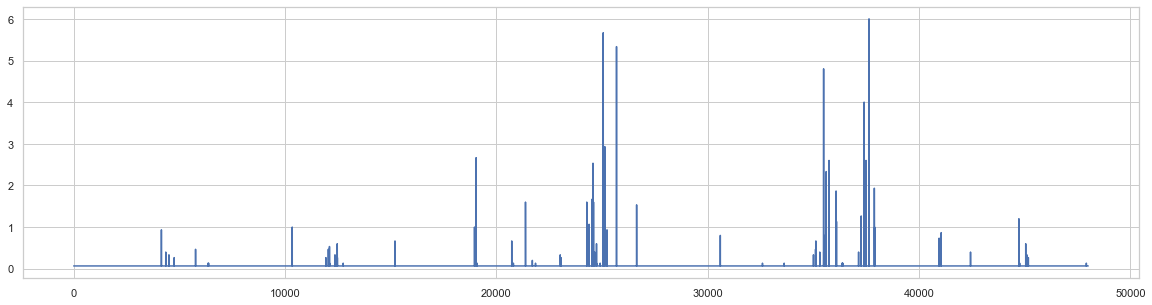

In [22]:
df["delta"].plot(figsize=(20,5))

In [23]:
df["delta"].describe()

count    48005.000000
mean         0.068357
std          0.066193
min          0.066650
25%          0.066685
50%          0.066695
75%          0.066706
max          6.002547
Name: delta, dtype: float64

In [24]:
1. / 0.066706

14.991155218421131

In [25]:
df[df["delta"]> 0.1]

,timestamp,body_index,J00_P0,J00_P1,J00_P2,J00_O0,J00_O1,J00_O2,J00_O3,J00_CONF,...,J30_CONF,J31_P0,J31_P1,J31_P2,J31_O0,J31_O1,J31_O2,J31_O3,J31_CONF,delta
4152,1.634869e+09,0,184.673,244.924,1547.53,-0.228028,0.670125,-0.148142,0.690645,2,...,2,139.873,-188.48300,1896.84,0.587926,-0.552534,0.188384,-0.559965,2,0.933720
4357,1.634869e+09,0,361.678,323.342,1679.59,0.640795,-0.355150,0.215856,-0.645489,1,...,2,408.520,-187.01300,1681.65,0.780795,-0.342247,0.159717,-0.497711,2,0.133400
4358,1.634869e+09,0,374.764,339.069,1660.16,0.581745,-0.435116,0.274409,-0.630037,1,...,2,382.385,-184.17400,1737.96,0.697290,-0.538104,0.359814,-0.307838,2,0.400149
4508,1.634869e+09,0,171.031,441.309,1834.04,0.605489,-0.353040,0.388061,-0.598460,2,...,2,109.555,-159.37500,1712.15,0.668810,-0.226780,0.440813,-0.554028,2,0.333465
4757,1.634869e+09,0,276.083,418.807,1801.44,0.529107,0.488994,-0.426953,-0.546481,2,...,2,373.663,-122.12700,1784.25,0.890789,0.284129,-0.218491,-0.279334,2,0.266780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45048,1.634872e+09,0,250.311,428.142,1864.37,0.642142,-0.385353,0.471873,-0.465287,2,...,2,309.760,-187.32600,1701.11,0.843251,-0.076589,0.246225,-0.471631,2,0.600245
45103,1.634872e+09,0,249.236,394.779,2213.69,0.887621,-0.150238,0.084912,-0.427022,2,...,2,634.556,8.15359,2105.49,0.906665,-0.032535,0.085683,-0.411775,2,0.333475
45170,1.634872e+09,0,305.779,368.997,2053.92,0.682243,-0.196466,0.379357,-0.593324,2,...,1,323.912,-244.29400,1887.11,0.788936,-0.500692,0.243071,-0.260392,1,0.200086
45172,1.634872e+09,0,277.686,358.322,1834.49,-0.465160,0.551286,-0.381213,0.578262,2,...,2,270.673,-180.68500,1828.82,0.694055,-0.382252,0.593108,-0.142805,2,0.266792


- 基本的に、interval = 0.066706
    - Sampling Rate: 1 / 0.066706 = 14.99 Hz

## [2] Sampling Rateの修正 (Resampling)

In [31]:
df_new = df.copy()

df_new["ts"] = pd.to_datetime(df_new["timestamp"], unit='s')
df_new = df_new.set_index("ts")

df_15Hz = df_new.asfreq("66ms", method="ffill")

In [32]:
df_new.head(10)

,timestamp,body_index,J00_P0,J00_P1,J00_P2,J00_O0,J00_O1,J00_O2,J00_O3,J00_CONF,...,J30_CONF,J31_P0,J31_P1,J31_P2,J31_O0,J31_O1,J31_O2,J31_O3,J31_CONF,delta
ts,,,,,,,,,,,,,,,,,,,,,
2021-10-22 02:15:46.000406016,1.634869e+09,0,47.8702,348.741,2230.89,0.550014,-0.434476,0.474469,-0.532536,2,...,2,-18.78380,-187.917,2152.40,0.630032,-0.257972,0.613827,-0.399658,2,NaN
2021-10-22 02:15:46.067111936,1.634869e+09,0,46.8710,351.886,2230.96,0.549369,-0.436875,0.473526,-0.532078,2,...,2,-15.25100,-198.904,2153.60,0.653550,-0.291262,0.585977,-0.380356,2,0.066706
2021-10-22 02:15:46.133796096,1.634869e+09,0,47.0129,353.611,2231.05,0.549459,-0.437178,0.473282,-0.531952,2,...,2,-8.13550,-215.948,2156.89,0.665434,-0.370231,0.545385,-0.350259,2,0.066684
2021-10-22 02:15:46.200502016,1.634869e+09,0,42.4397,363.462,2242.18,0.572130,-0.413092,0.451773,-0.545823,2,...,2,-12.72050,-215.574,2146.01,0.657378,-0.317591,0.606166,-0.315521,2,0.066706
2021-10-22 02:15:46.267185920,1.634869e+09,0,44.0698,365.538,2232.18,0.536085,-0.453433,0.475391,-0.530108,2,...,2,-8.65410,-226.098,2153.21,0.675698,-0.352522,0.564011,-0.317887,2,0.066684
2021-10-22 02:15:46.333893120,1.634869e+09,0,45.0520,364.627,2230.03,0.522529,-0.466485,0.495206,-0.513932,2,...,2,-7.80243,-227.691,2147.23,0.680719,-0.362863,0.552943,-0.314970,2,0.066707
2021-10-22 02:15:46.400576000,1.634869e+09,0,45.0826,364.617,2230.11,0.522595,-0.466456,0.495211,-0.513887,2,...,2,-7.61515,-227.800,2147.15,0.681237,-0.363088,0.552398,-0.314548,2,0.066683
2021-10-22 02:15:46.467271168,1.634869e+09,0,46.9900,366.558,2231.27,0.528918,-0.460229,0.489762,-0.518235,2,...,2,-2.38842,-232.735,2149.77,0.698080,-0.375637,0.526720,-0.306835,2,0.066695
2021-10-22 02:15:46.533967104,1.634869e+09,0,49.9811,367.818,2228.02,0.529567,-0.454118,0.491521,-0.521289,2,...,2,-11.04220,-223.748,2147.84,0.683870,-0.325726,0.552021,-0.348564,2,0.066696


In [34]:
df_15Hz.head(10)

,timestamp,body_index,J00_P0,J00_P1,J00_P2,J00_O0,J00_O1,J00_O2,J00_O3,J00_CONF,...,J30_CONF,J31_P0,J31_P1,J31_P2,J31_O0,J31_O1,J31_O2,J31_O3,J31_CONF,delta
ts,,,,,,,,,,,,,,,,,,,,,
2021-10-22 02:15:46.000406016,1.634869e+09,0,47.8702,348.741,2230.89,0.550014,-0.434476,0.474469,-0.532536,2,...,2,-18.78380,-187.917,2152.40,0.630032,-0.257972,0.613827,-0.399658,2,NaN
2021-10-22 02:15:46.066406016,1.634869e+09,0,47.8702,348.741,2230.89,0.550014,-0.434476,0.474469,-0.532536,2,...,2,-18.78380,-187.917,2152.40,0.630032,-0.257972,0.613827,-0.399658,2,NaN
2021-10-22 02:15:46.132406016,1.634869e+09,0,46.8710,351.886,2230.96,0.549369,-0.436875,0.473526,-0.532078,2,...,2,-15.25100,-198.904,2153.60,0.653550,-0.291262,0.585977,-0.380356,2,0.066706
2021-10-22 02:15:46.198406016,1.634869e+09,0,47.0129,353.611,2231.05,0.549459,-0.437178,0.473282,-0.531952,2,...,2,-8.13550,-215.948,2156.89,0.665434,-0.370231,0.545385,-0.350259,2,0.066684
2021-10-22 02:15:46.264406016,1.634869e+09,0,42.4397,363.462,2242.18,0.572130,-0.413092,0.451773,-0.545823,2,...,2,-12.72050,-215.574,2146.01,0.657378,-0.317591,0.606166,-0.315521,2,0.066706
2021-10-22 02:15:46.330406016,1.634869e+09,0,44.0698,365.538,2232.18,0.536085,-0.453433,0.475391,-0.530108,2,...,2,-8.65410,-226.098,2153.21,0.675698,-0.352522,0.564011,-0.317887,2,0.066684
2021-10-22 02:15:46.396406016,1.634869e+09,0,45.0520,364.627,2230.03,0.522529,-0.466485,0.495206,-0.513932,2,...,2,-7.80243,-227.691,2147.23,0.680719,-0.362863,0.552943,-0.314970,2,0.066707
2021-10-22 02:15:46.462406016,1.634869e+09,0,45.0826,364.617,2230.11,0.522595,-0.466456,0.495211,-0.513887,2,...,2,-7.61515,-227.800,2147.15,0.681237,-0.363088,0.552398,-0.314548,2,0.066683
2021-10-22 02:15:46.528406016,1.634869e+09,0,46.9900,366.558,2231.27,0.528918,-0.460229,0.489762,-0.518235,2,...,2,-2.38842,-232.735,2149.77,0.698080,-0.375637,0.526720,-0.306835,2,0.066695


count                     49720
mean     0 days 00:00:00.066000
std             0 days 00:00:00
min      0 days 00:00:00.066000
25%      0 days 00:00:00.066000
50%      0 days 00:00:00.066000
75%      0 days 00:00:00.066000
max      0 days 00:00:00.066000
Name: delta, dtype: object

<AxesSubplot:xlabel='ts'>

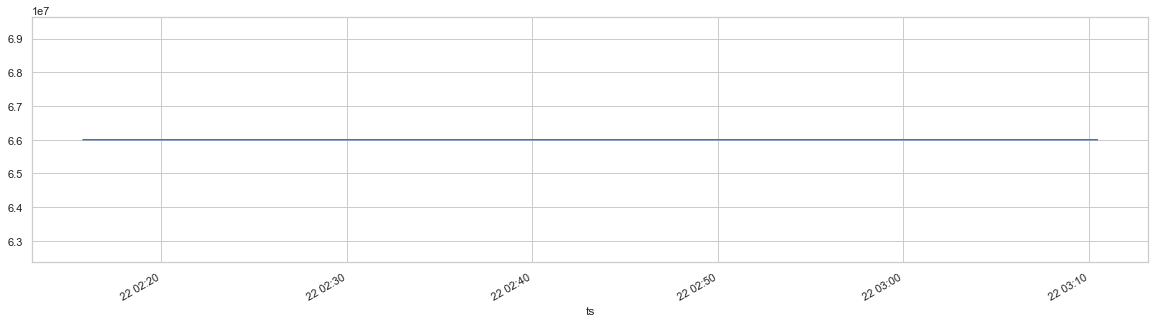

In [39]:
# Check timestamps
df_15Hz["delta"] = df_15Hz.index.shift(1) - df_15Hz["timestamp"].index
display(df_15Hz["delta"].describe())

df_15Hz["delta"].plot(figsize=(20,5))